# Look at all user activity 

|author|contestID|id|language|memoryBytes|participantType|passedTestCount|points|problem_index|problem_name|problem_tags|relativeTimeSeconds|startTimeSeconds|testset|timeMilliseconds|verdict
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
0|yj12|672|17895187|GNU C++|6246400|PRACTICE|60|2000|D|Robin Hood|[binary search, greedy]|2147483647|1462984500|TESTS|187|OK
1|yj12|672|17895170|GNU C++|6246400|PRACTICE|60|2000|D|Robin Hood|[binary search, greedy]|2147483647|1462984500|TESTS|233|OK


In [242]:
%matplotlib inline

import requests
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [326]:
handle = 'chenmark'
maxcount = '100000000'
url = 'http://codeforces.com/api/user.status?handle=' + handle + '&from=1&count=' + maxcount

r = requests.get(url).json()['result']

In [338]:
r[0]

{u'author': {u'contestId': 671,
  u'ghost': False,
  u'members': [{u'handle': u'chenmark'}],
  u'participantType': u'PRACTICE',
  u'startTimeSeconds': 1462984500},
 u'contestId': 671,
 u'creationTimeSeconds': 1463025177,
 u'id': 17869181,
 u'memoryConsumedBytes': 5427200,
 u'passedTestCount': 60,
 u'problem': {u'contestId': 671,
  u'index': u'B',
  u'name': u'Robin Hood',
  u'points': 1000.0,
  u'tags': [u'binary search', u'greedy'],
  u'type': u'PROGRAMMING'},
 u'programmingLanguage': u'GNU C++',
 u'relativeTimeSeconds': 2147483647,
 u'testset': u'TESTS',
 u'timeConsumedMillis': 156,
 u'verdict': u'OK'}

In [345]:
arr = []
keys = ['testset', 'passedTestCount', 'author', 'relativeTimeSeconds', 
        'language', 'memoryBytes', 'timeMilliseconds', 'problem_name', 'problem_index',
        'problem_tags', 'points', 'contestID', 'verdict', 'id', 'participantType', 'startTimeSeconds']

for rr in r:
#    try:
    temp = dict.fromkeys(keys)
    temp['author'] = rr['author']['members'][0]['handle']
    temp['startTimeSeconds'] = rr['creationTimeSeconds']
    if 'startTimeSeconds' not in rr['author']:
        temp['participantType'] = 'GYM'
    else:
    #    temp['startTimeSeconds'] = rr['author']['startTimeSeconds']
        temp['participantType'] = rr['author']['participantType']
    temp['id'] = rr['id']
    temp['verdict'] = rr['verdict']
    temp['contestID'] = rr['contestId']
    if 'points' not in rr['problem']:
        temp['points'] = 0
    else:
        temp['points'] = rr['problem']['points']
    temp['problem_tags'] = rr['problem']['tags']
    temp['problem_index'] = rr['problem']['index']
    temp['problem_name'] = rr['problem']['name']
    temp['timeMilliseconds'] = rr['timeConsumedMillis']
    temp['memoryBytes'] = rr['memoryConsumedBytes']
    temp['language'] = rr['programmingLanguage']
    temp['relativeTimeSeconds'] = rr['relativeTimeSeconds']
    temp['passedTestCount'] = rr['passedTestCount']
    temp['testset'] = rr['testset']

    arr.append(temp)
#    except:
#        print "----------------------"
#        for key, val in rr.iteritems():
#            print key, ":", val
    
hact = pd.DataFrame.from_dict(arr)

In [340]:
hact.relativeTimeSeconds

0       2147483647
1       2147483647
2       2147483647
3       2147483647
4       2147483647
5       2147483647
6       2147483647
7       2147483647
8             7243
9             7152
10            6719
11            6203
12            5573
13            2064
14             474
15      2147483647
16      2147483647
17      2147483647
18      2147483647
19            5161
20             822
21      2147483647
22      2147483647
23            3383
24            3215
25             768
26      2147483647
27      2147483647
28      2147483647
29            3617
           ...    
1064          4211
1065          1815
1066           765
1067          5805
1068          5134
1069          1674
1070           997
1071    2147483647
1072    2147483647
1073    2147483647
1074          5434
1075          1565
1076           746
1077    2147483647
1078    2147483647
1079          7117
1080          4245
1081          4110
1082          3824
1083          3651
1084          3101
1085        

# Visualizations

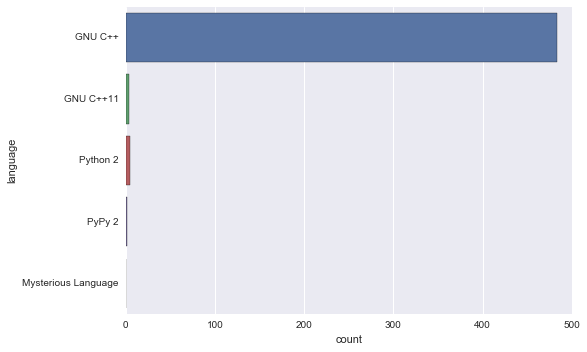

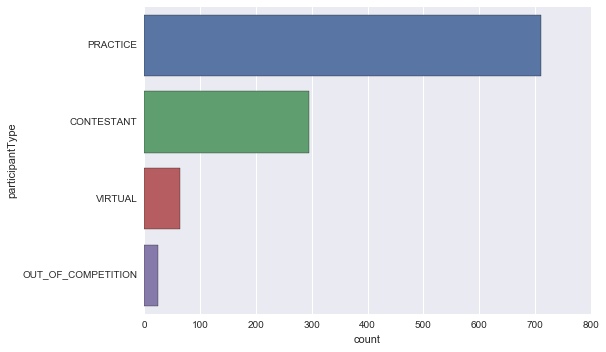

In [328]:
passidx = hact.verdict=='OK'
set(hact.participantType)
sns.set(rc={'figure.facecolor':'white'})
sns.countplot(y='language', data=hact.loc[hact['verdict']=='OK'])

plt.figure()
sns.countplot(y='participantType', data=hact)

In [330]:
hact.startTimeSeconds
years = []
for s in hact.startTimeSeconds:
    time = datetime.fromtimestamp(s)
    years.append(time.year)

hact['year'] = years
#datetime.fromtimestamp(hact.startTimeSeconds[0])
#hact['date'] = pd.to_datetime(hact.startTimeSeconds, unit='s')
#
##import matplotlib.dates as mdates
#
##ax.xaxis.set_major_locator(mdates.AutoDateLocator())
##ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

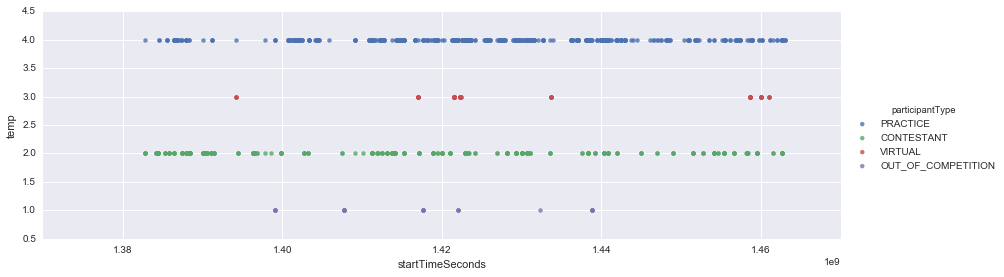

In [346]:
hact['temp'] = 1
hact.loc[hact.participantType=='CONTESTANT', 'temp'] = 2
hact.loc[hact.participantType=='VIRTUAL', 'temp'] = 3
hact.loc[hact.participantType=='PRACTICE', 'temp'] = 4
hact.loc[hact.participantType=='GYM', 'temp'] = 4
sns.lmplot(x='startTimeSeconds', y = 'temp', hue='participantType', data=hact, fit_reg=False, size=4, aspect=3)

In [336]:
hact.loc[hact.year==2010]

,author,contestID,id,language,memoryBytes,participantType,passedTestCount,points,problem_index,problem_name,problem_tags,relativeTimeSeconds,startTimeSeconds,testset,timeMilliseconds,verdict,year,temp
366,chenmark,41,11006273,GNU C++,0,PRACTICE,50,2500,E,3-cycles,"[constructive algorithms, graphs, greedy]",2147483647,1289232000,TESTS,60,OK,2010,4


AttributeError: 'DataFrame' object has no attribute 'year'

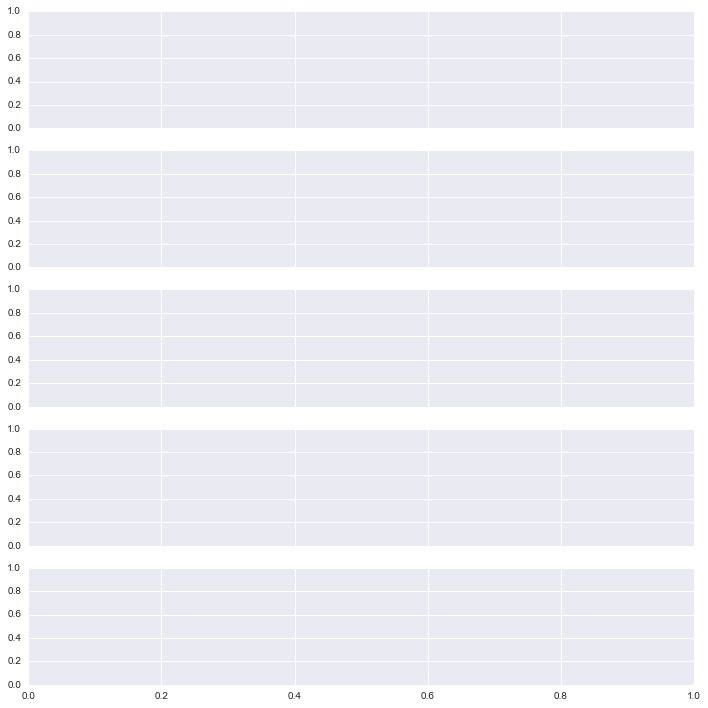

In [313]:
#f, ax = plt.subplots(figsize=(12, 7), facecolor='white')
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(rc={'figure.facecolor':'white'})
g = sns.FacetGrid(hact, row="participantType", margin_titles=True, size=2, aspect=5)
#bins = np.linspace(min(hact.startTimeSeconds), max(hact.startTimeSeconds), 20)
#g.map(plt.hist, "startTimeSeconds", color="steelblue", bins=bins, lw=0)
bins = np.linspace(min(hact.year), max(hact.year), 20)
g.map(plt.hist, "year", color="steelblue", bins=bins, lw=0)

#test = g.axes[0][0]
ticks = test.get_xticks()
print ticks
#
#ticlabs = []
#for tic in ticks:
#    ticlabs.append(str(datetime.fromtimestamp(tic))) 
#    
#test.set_xticklabels(ticlabs)
#ax = plt.gca()
#print ax.xaxis.get_ticklabels()
#fig = plt.gcf()
#fig.get_yticks()

In [214]:
test = g.axes[0][0]
ticks = test.get_xticks()

ticlabs = []
for tic in ticks:
    print pd.to_datetime(tic, unit='s')
    ticlabs.append(str(datetime.fromtimestamp(tic))) 
    
test.set_xticklabels(ticlabs)
test

1970-01-01 00:33:30
1970-01-01 00:33:31
1970-01-01 00:33:32
1970-01-01 00:33:33
1970-01-01 00:33:34
1970-01-01 00:33:35
1970-01-01 00:33:36


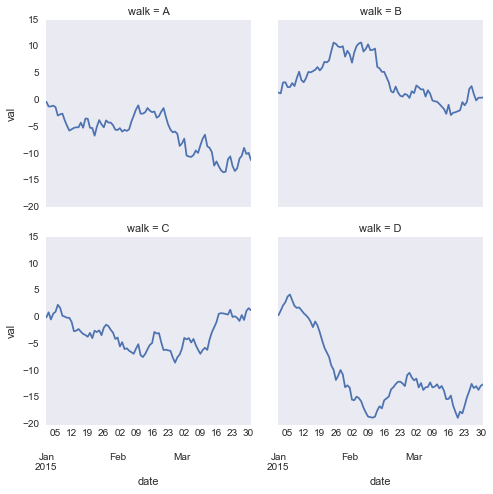

In [215]:
df = pd.DataFrame(
    data=np.random.randn(90, 4),
    columns=pd.Series(list("ABCD"), name="walk"),
    index=pd.date_range("2015-01-01", "2015-03-31",
                        name="date"))
df = df.cumsum(axis=0).stack().reset_index(name="val")
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
g = sns.FacetGrid(df, col="walk", col_wrap=2, size=3.5)
g = g.map_dataframe(dateplot, "date", "val")

In [216]:
np.arange(1,5,1)

array([1, 2, 3, 4])